In [135]:
import torch
from torchvision.io import read_image, ImageReadMode
from torchvision.transforms import Resize, ToPILImage, ToTensor
from torchvision.utils import draw_segmentation_masks, make_grid

from tiler import Tiler
from loguru import logger
from PIL import Image

In [112]:
tiler = Tiler(tile_size=(1024, 1024), stride=1024)

In [128]:
img_path = "/Users/xbkaishui/Desktop/test_tile.png"
# image = read_image(img_path)
image = Image.open(img_path).convert('RGB')
import numpy as np
image = torch.from_numpy( np.asarray(image) )
# image = ToPILImage()(image).convert('RGB')

In [136]:
image = read_image(img_path)
print(image.size())

torch.Size([4, 2047, 3903])


In [129]:
image.shape

torch.Size([2047, 3903, 3])

In [132]:
# image = image.transpose(2, 0, 1)

TypeError: transpose() received an invalid combination of arguments - got (int, int, int), but expected one of:
 * (int dim0, int dim1)
 * (name dim0, name dim1)


In [117]:
tiled_image = tiler.tile(image).type(torch.uint8)

In [118]:
tiled_image

tensor([[[[1, 1, 1,  ..., 0, 0, 0],
          [1, 1, 1,  ..., 0, 0, 0],
          [1, 1, 1,  ..., 0, 0, 0],
          ...,
          [1, 1, 1,  ..., 1, 1, 1],
          [1, 1, 1,  ..., 1, 1, 1],
          [1, 1, 1,  ..., 1, 1, 1]],

         [[1, 1, 1,  ..., 0, 0, 0],
          [1, 1, 1,  ..., 0, 0, 0],
          [1, 1, 1,  ..., 0, 0, 0],
          ...,
          [1, 1, 1,  ..., 1, 1, 1],
          [1, 1, 1,  ..., 1, 1, 1],
          [1, 1, 1,  ..., 1, 1, 1]],

         [[1, 1, 1,  ..., 0, 0, 0],
          [1, 1, 1,  ..., 0, 0, 0],
          [1, 1, 1,  ..., 0, 0, 0],
          ...,
          [1, 1, 1,  ..., 1, 1, 1],
          [1, 1, 1,  ..., 1, 1, 1],
          [1, 1, 1,  ..., 1, 1, 1]]],


        [[[0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          ...,
          [1, 1, 1,  ..., 1, 1, 1],
          [1, 1, 1,  ..., 1, 1, 1],
          [1, 1, 1,  ..., 1, 1, 1]],

         [[0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0

In [75]:
image.shape

torch.Size([4, 2047, 3903])

In [119]:
image

tensor([[[1.0000, 1.0000, 1.0000,  ..., 0.9725, 0.9725, 0.9725],
         [1.0000, 1.0000, 1.0000,  ..., 0.9882, 0.9882, 0.9882],
         [1.0000, 1.0000, 1.0000,  ..., 0.9255, 0.9255, 0.9216],
         ...,
         [0.9961, 0.9961, 0.9961,  ..., 0.9176, 0.9176, 0.9176],
         [0.9961, 0.9961, 0.9961,  ..., 0.9176, 0.9176, 0.9176],
         [0.9961, 0.9961, 0.9961,  ..., 0.9176, 0.9176, 0.9176]],

        [[1.0000, 1.0000, 1.0000,  ..., 0.9294, 0.9294, 0.9294],
         [1.0000, 1.0000, 1.0000,  ..., 0.9569, 0.9569, 0.9569],
         [1.0000, 1.0000, 1.0000,  ..., 0.8392, 0.8392, 0.8392],
         ...,
         [0.9961, 0.9961, 0.9961,  ..., 0.9255, 0.9255, 0.9255],
         [0.9961, 0.9961, 0.9961,  ..., 0.9255, 0.9255, 0.9255],
         [0.9961, 0.9961, 0.9961,  ..., 0.9255, 0.9255, 0.9255]],

        [[1.0000, 1.0000, 1.0000,  ..., 0.9294, 0.9294, 0.9294],
         [1.0000, 1.0000, 1.0000,  ..., 0.9569, 0.9569, 0.9569],
         [1.0000, 1.0000, 1.0000,  ..., 0.8392, 0.8392, 0.

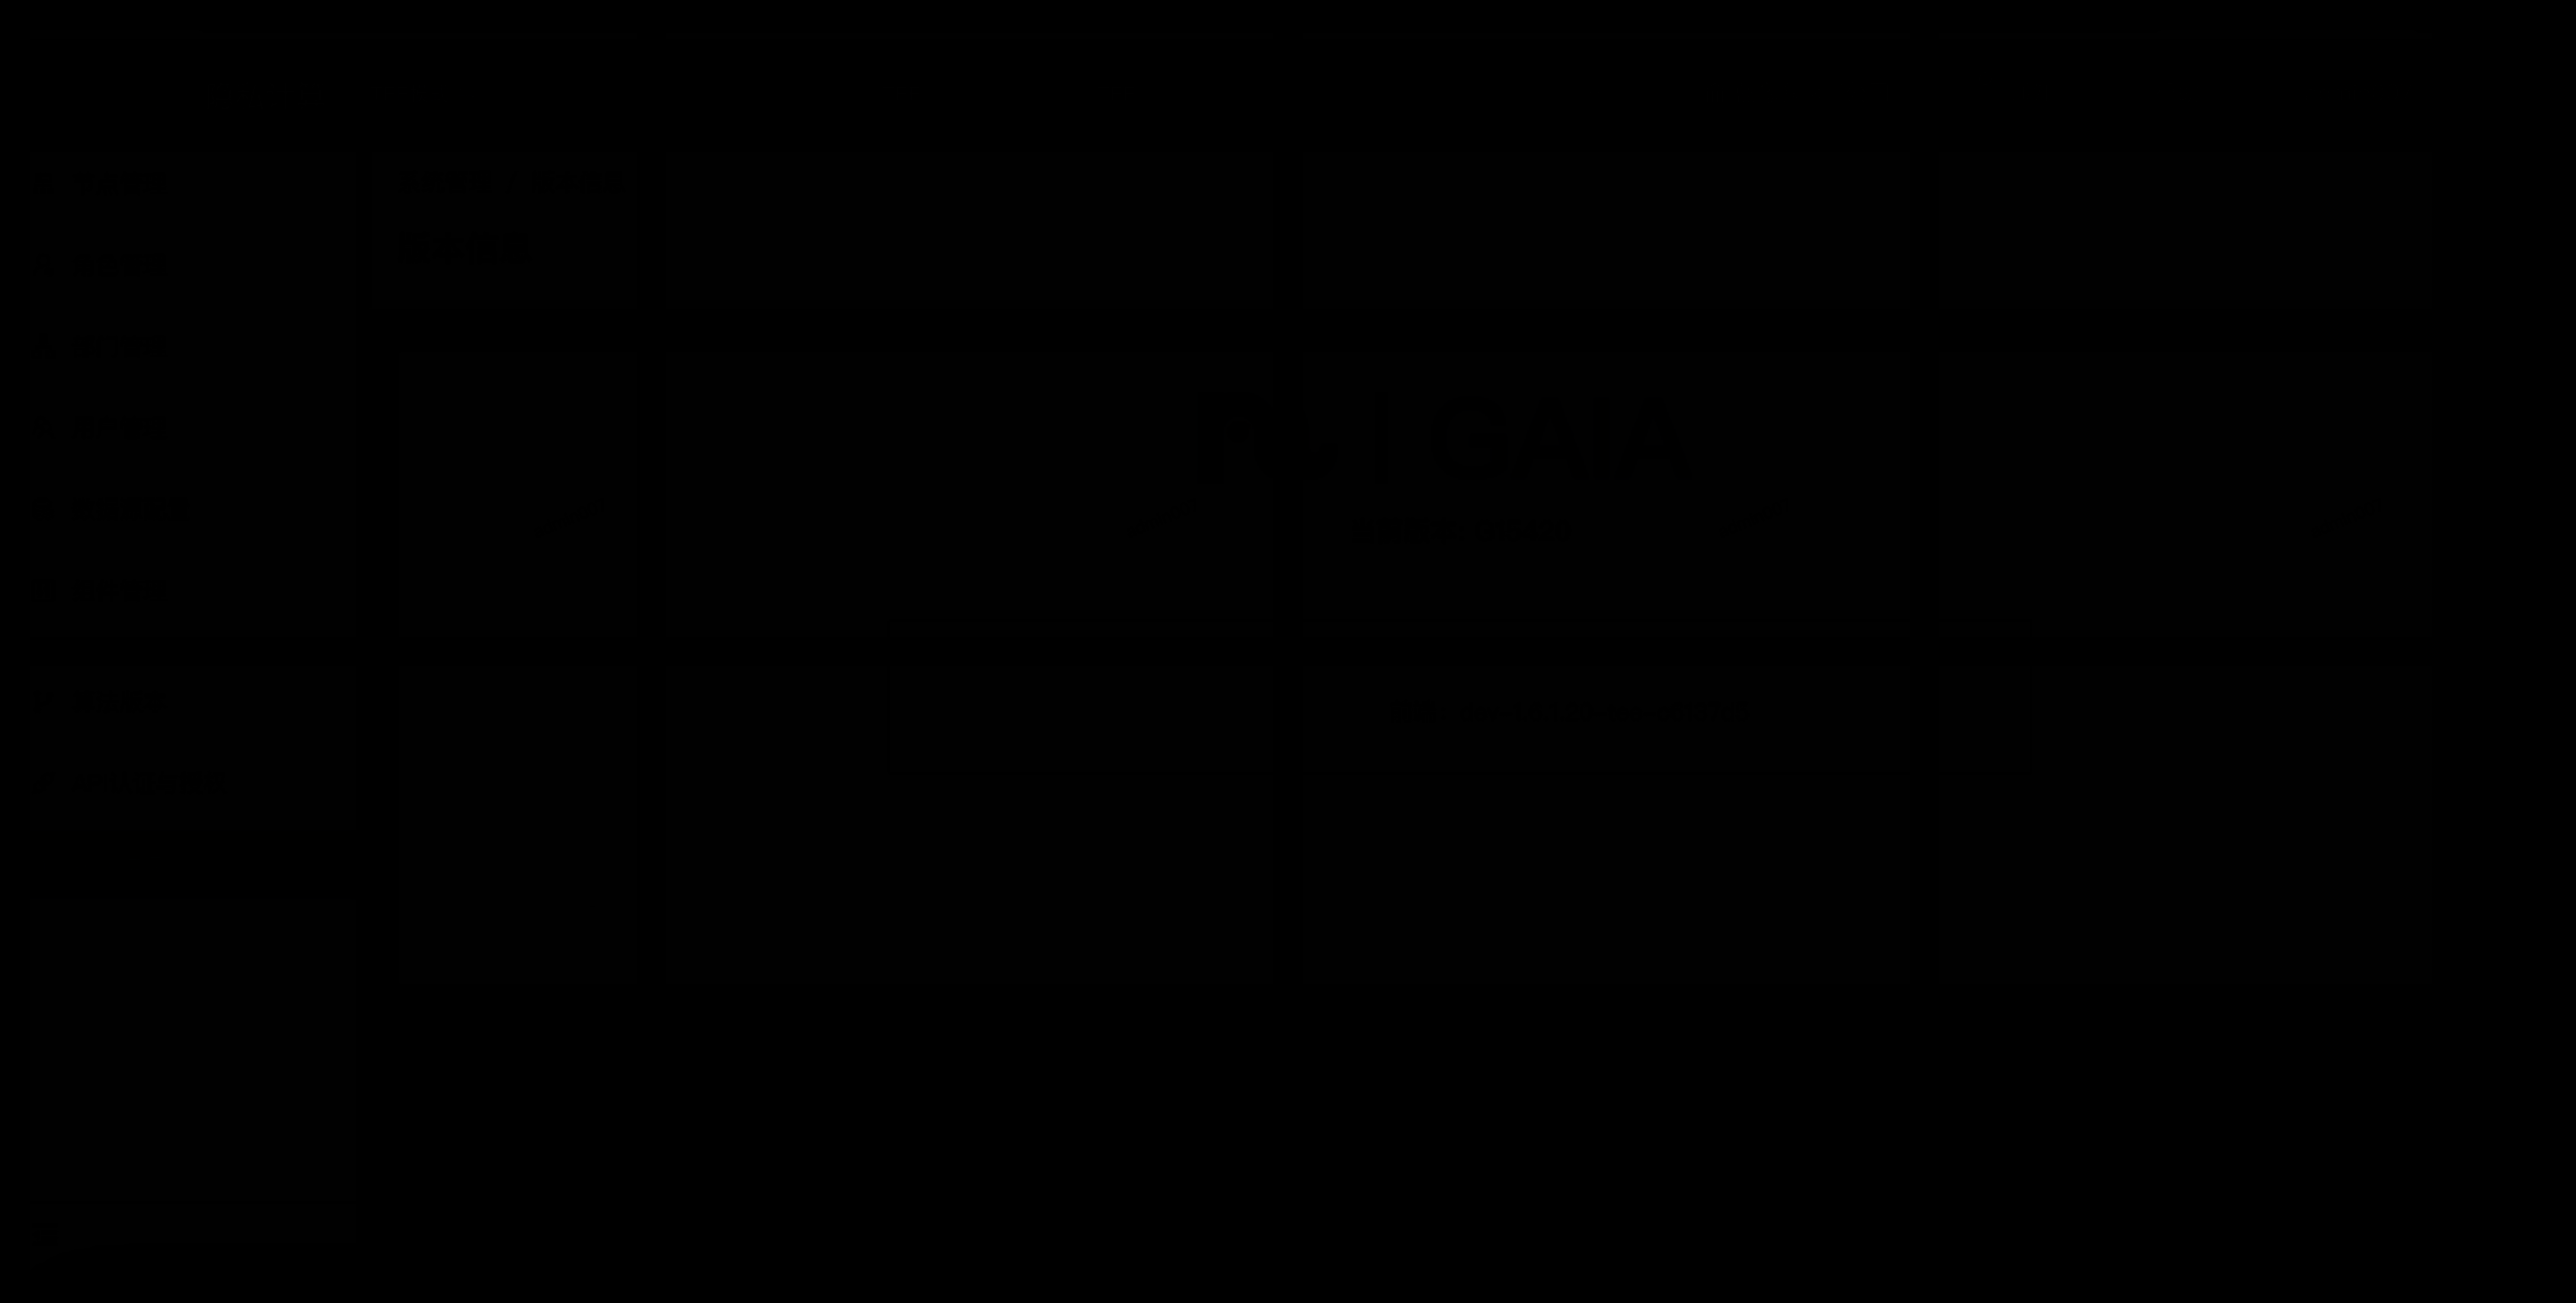

In [120]:
ToPILImage()(make_grid(tiled_image, nrow=4, padding=50))

In [39]:
# tiled_image

In [78]:
untiled_image = tiler.untile(tiled_image)

In [83]:
# torch.equal(image, untiled_image)
untiled_image.shape
image.shape

torch.Size([4, 2047, 3903])

In [89]:
# untiled_image.shape
# image.shape
logger.info(f"image shape: {image.shape}, untiled_image shape: {untiled_image.squeeze(0).shape}")
logger.info(f" type of image: {type(image)}, type of untiled_image: {type(untiled_image.squeeze(0))}")
# torch.equal(image, untiled_image.squeeze(0))

2023-05-29 18:27:33.931 | INFO     | __main__:<module>:3 - image shape: torch.Size([4, 2047, 3903]), untiled_image shape: torch.Size([4, 2047, 3903])
2023-05-29 18:27:33.933 | INFO     | __main__:<module>:4 -  type of image: <class 'torch.Tensor'>, type of untiled_image: <class 'torch.Tensor'>


In [90]:
# ToPILImage()(untiled_image.squeeze(0))
# ToPILImage()(untiled_image.unsqueeze(0))
image

tensor([[[255, 255, 255,  ..., 248, 248, 248],
         [255, 255, 255,  ..., 252, 252, 252],
         [255, 255, 255,  ..., 236, 236, 235],
         ...,
         [254, 254, 254,  ..., 234, 234, 234],
         [254, 254, 254,  ..., 234, 234, 234],
         [254, 254, 254,  ..., 234, 234, 234]],

        [[255, 255, 255,  ..., 237, 237, 237],
         [255, 255, 255,  ..., 244, 244, 244],
         [255, 255, 255,  ..., 214, 214, 214],
         ...,
         [254, 254, 254,  ..., 236, 236, 236],
         [254, 254, 254,  ..., 236, 236, 236],
         [254, 254, 254,  ..., 236, 236, 236]],

        [[255, 255, 255,  ..., 237, 237, 237],
         [255, 255, 255,  ..., 244, 244, 244],
         [255, 255, 255,  ..., 214, 214, 214],
         ...,
         [254, 254, 254,  ..., 239, 239, 239],
         [254, 254, 254,  ..., 239, 239, 239],
         [254, 254, 254,  ..., 239, 239, 239]],

        [[255, 255, 255,  ..., 255, 255, 255],
         [255, 255, 255,  ..., 255, 255, 255],
         [25

In [91]:
untiled_image

tensor([[[[255., 255., 255.,  ..., 248., 248., 248.],
          [255., 255., 255.,  ..., 252., 252., 252.],
          [255., 255., 255.,  ..., 236., 236., 235.],
          ...,
          [254., 254., 254.,  ..., 234., 234., 234.],
          [254., 254., 254.,  ..., 234., 234., 234.],
          [254., 254., 254.,  ..., 234., 234., 234.]],

         [[255., 255., 255.,  ..., 237., 237., 237.],
          [255., 255., 255.,  ..., 244., 244., 244.],
          [255., 255., 255.,  ..., 214., 214., 214.],
          ...,
          [254., 254., 254.,  ..., 236., 236., 236.],
          [254., 254., 254.,  ..., 236., 236., 236.],
          [254., 254., 254.,  ..., 236., 236., 236.]],

         [[255., 255., 255.,  ..., 237., 237., 237.],
          [255., 255., 255.,  ..., 244., 244., 244.],
          [255., 255., 255.,  ..., 214., 214., 214.],
          ...,
          [254., 254., 254.,  ..., 239., 239., 239.],
          [254., 254., 254.,  ..., 239., 239., 239.],
          [254., 254., 254.,  ...

In [92]:
# untiled_image

tensor([[[[255., 255., 255.,  ..., 248., 248., 248.],
          [255., 255., 255.,  ..., 252., 252., 252.],
          [255., 255., 255.,  ..., 236., 236., 235.],
          ...,
          [254., 254., 254.,  ..., 234., 234., 234.],
          [254., 254., 254.,  ..., 234., 234., 234.],
          [254., 254., 254.,  ..., 234., 234., 234.]],

         [[255., 255., 255.,  ..., 237., 237., 237.],
          [255., 255., 255.,  ..., 244., 244., 244.],
          [255., 255., 255.,  ..., 214., 214., 214.],
          ...,
          [254., 254., 254.,  ..., 236., 236., 236.],
          [254., 254., 254.,  ..., 236., 236., 236.],
          [254., 254., 254.,  ..., 236., 236., 236.]],

         [[255., 255., 255.,  ..., 237., 237., 237.],
          [255., 255., 255.,  ..., 244., 244., 244.],
          [255., 255., 255.,  ..., 214., 214., 214.],
          ...,
          [254., 254., 254.,  ..., 239., 239., 239.],
          [254., 254., 254.,  ..., 239., 239., 239.],
          [254., 254., 254.,  ...

In [100]:
# ToPILImage()(untiled_image)
untiled_image.sum()
image.sum()

tensor(7589202234)

In [108]:
# ToPILImage(mode='RGBA')(untiled_image.squeeze(0))
img_2 = ToPILImage()(untiled_image.squeeze(0)).convert('RGB')
img_2.show()